In [28]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [3]:
iris=datasets.load_iris()

In [9]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
X=iris['data'][:,[2,3]] # only petal length, petal width

In [14]:
y=(iris['target']==2).astype(np.float)

In [19]:
svm_clf=Pipeline([('standardscaler',StandardScaler())
                  ,('svm',LinearSVC(C=1,loss='hinge'))])

In [20]:
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svm', LinearSVC(C=1, loss='hinge'))])

In [22]:
svm_clf.predict([[5.5,1.8]])

array([1.])

Unlike Logistic Regression classifers, SVM classfiers do not output probabilities for each class

Set loss='hinge' since this is not default value

### Nonlinear SVM

In [26]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [32]:
X,y=make_moons(n_samples=100,noise=0.15)

In [43]:
X[2,],y[2]

(array([0.87954954, 0.39575705]), 0)

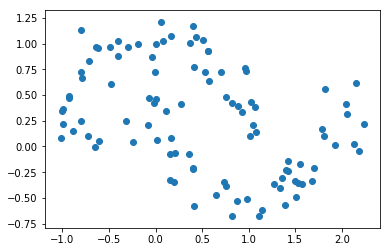

In [38]:
plt.scatter(X[:,0],X[:,1])

In [47]:
polynomial_svm_clf=Pipeline([('Poly',PolynomialFeatures(degree=2)),
                            ('scaler',StandardScaler()),
                            ('svm',LinearSVC(C=10,loss='hinge'))])

In [48]:
polynomial_svm_clf.fit(X,y)

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('Poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('svm', LinearSVC(C=10, loss='hinge'))])

In [49]:
polynomial_svm_clf.predict([[0.87954954, 0.39575705]])

array([0])

### Polynomial Kernel

In [50]:
#kernel trick
from sklearn.svm import SVC

In [51]:
poly_kernel_svm_clf=Pipeline([
                            ('scaler',StandardScaler()),
                            ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))])

In [52]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### Similarity Features

In [53]:
#Radial Basis Function (RBF)
rbf_kernel_svm_clf=Pipeline([
                            ('scaler',StandardScaler()),
                            ('rbf_clf',SVC(kernel='rbf',gamma=2,C=0.001))])

In [54]:
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rbf_clf', SVC(C=0.001, gamma=2))])

### SVM Regression

In [58]:
from sklearn.svm import LinearSVR
svm_reg=LinearSVR(epsilon=1)
svm_reg.fit(X,y)

LinearSVR(epsilon=1)

In [57]:
from sklearn.svm import SVR
svm_poly_reg=SVR(kernel='poly',degree=3,C=100,epsilon=1)
svm_poly_reg.fit(X,y)

SVR(C=100, epsilon=1, kernel='poly')